### Meshes in 2D

In 2D we provide a mesh for rectangles, `StructuredRectangleMesh`:

source module for methodsNM imported.


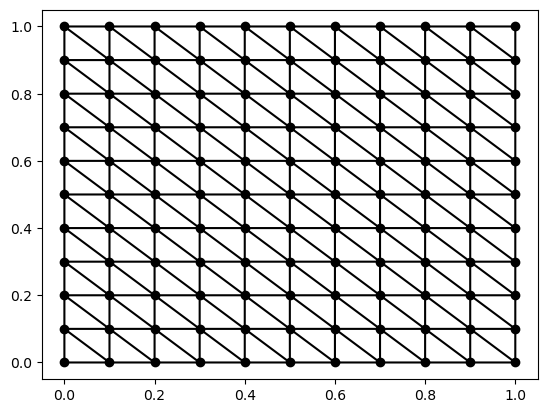

In [1]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import DrawMesh2D
m = StructuredRectangleMesh(10, 10)
DrawMesh2D(m)

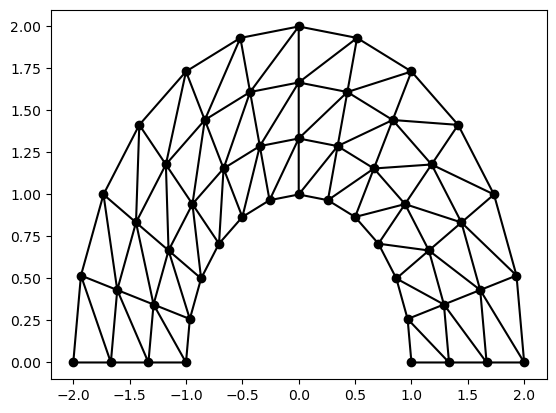

In [2]:
from numpy import sin, cos, pi
mc = StructuredRectangleMesh(12, 3, mapping= lambda x,y: (cos(pi*x)*(1+y), sin(pi*x)*(1+y)))
DrawMesh2D(mc)

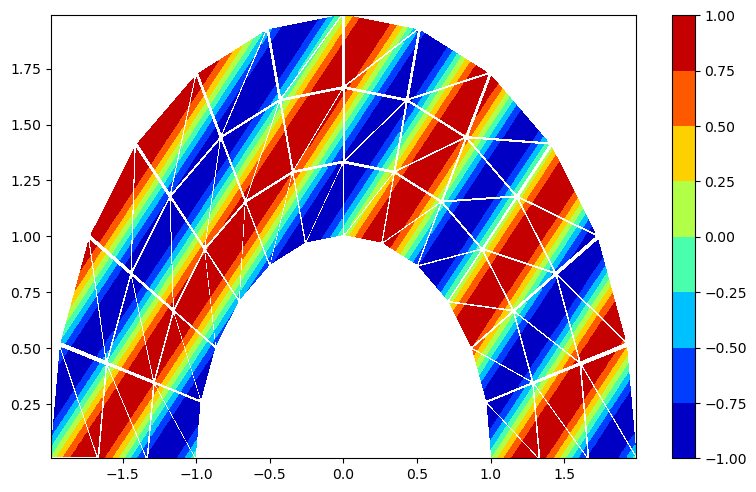

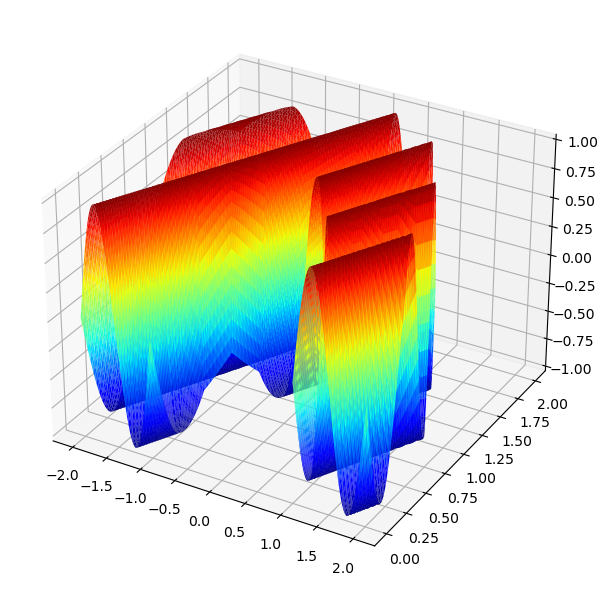

In [3]:
from methodsnm.visualize import DrawFunction2D
from methodsnm.meshfct import GlobalFunction
from numpy import sin, cos, pi
u = GlobalFunction(function=lambda x: sin(2*(x[0]-x[1])*pi), mesh=mc)
DrawFunction2D(u, sampling=10, contour=True, shrink_eps=0.08,figsize=(8,5))
DrawFunction2D(u, sampling=20, contour=False, figsize=(6,6))

### FEFunctions in 2D

#### Task `FES2D`-1

Implement the `P1_Triangle_Space` to make the following visualization of basis functions work:

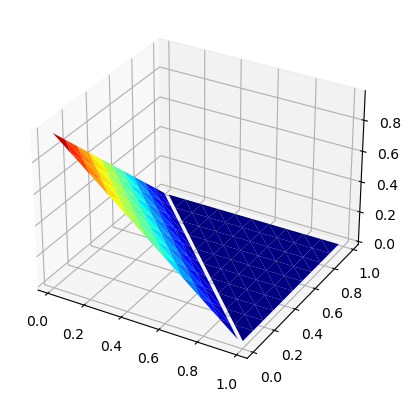

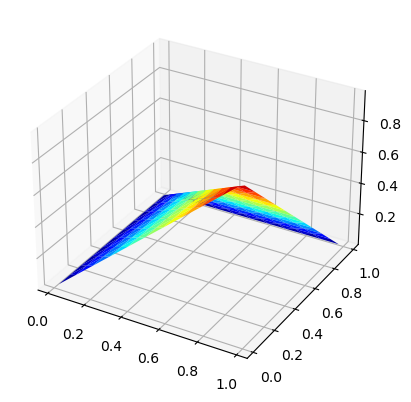

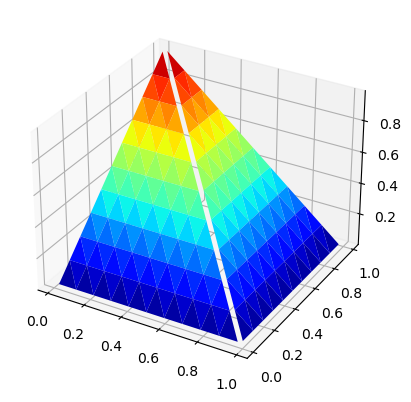

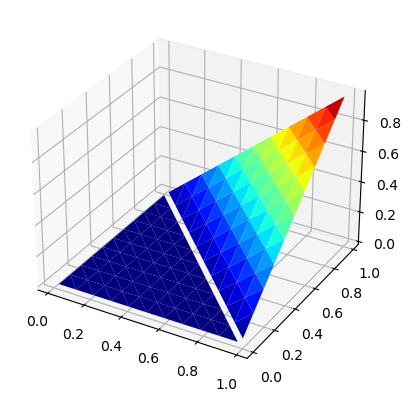

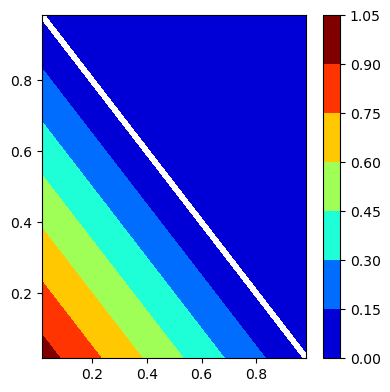

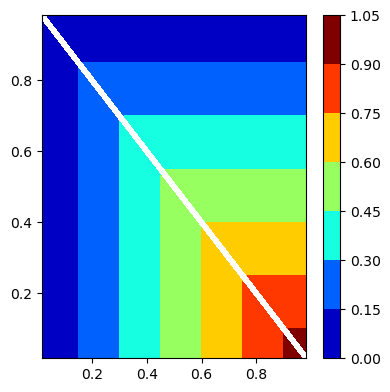

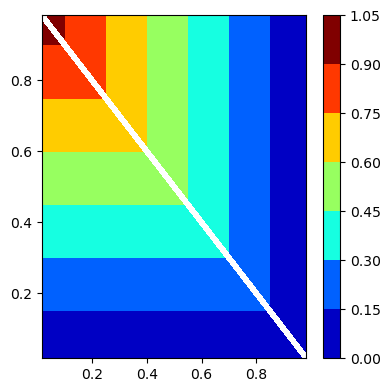

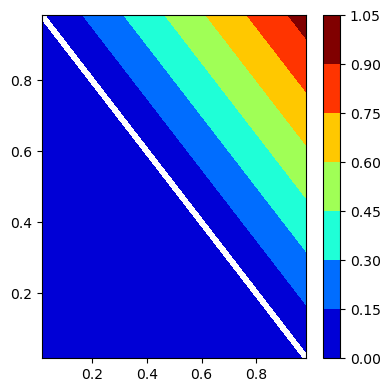

In [4]:
from methodsnm.fes import *
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P1_Triangle_Space(m)
uh = FEFunction(fes)
for contour in [False, True]:
    for i in range(fes.ndof):
        uh.vector[:] = 0
        uh.vector[i] = 1
        DrawFunction2D(uh,shrink_eps=0.05, figsize=(4,4), contour=contour)   



#### Task `FES2D`-2

Implement the P2 of the Triangle FESpace (or implement a Triangle FESpace that takes the polynomial degree as argument).

In [5]:
m = StructuredRectangleMesh(1, 1)
m. edges

array([[0, 1],
       [2, 3],
       [0, 2],
       [1, 3],
       [2, 1]])

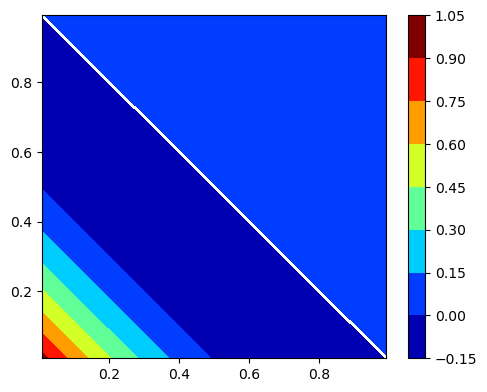

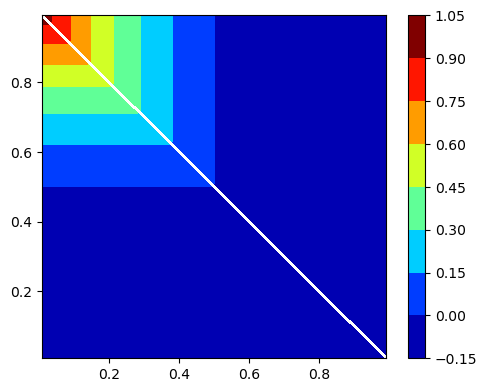

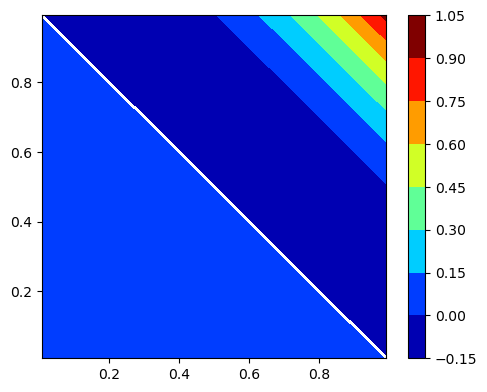

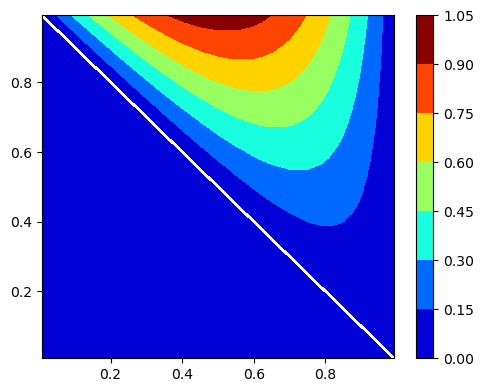

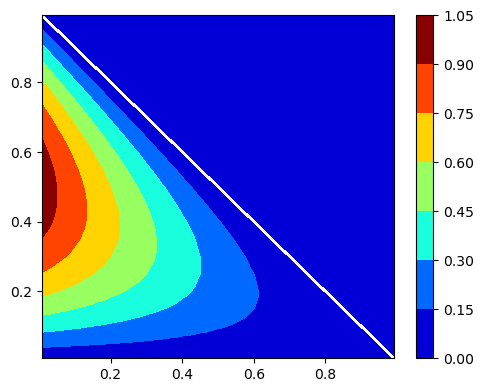

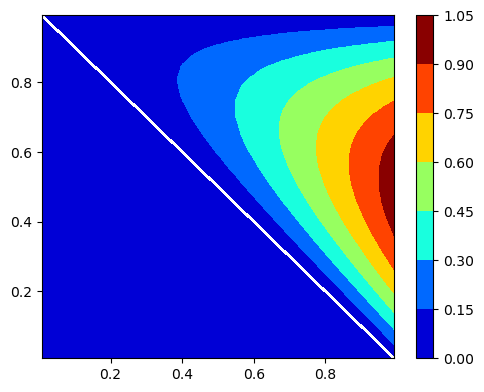

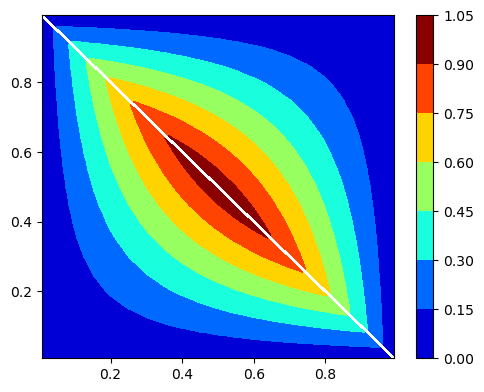

In [6]:
from methodsnm.fes import P2_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P2_Triangle_Space(m)
uh = FEFunction(fes)
for i in range(fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    DrawFunction2D(uh, sampling=20, shrink_eps=0.025, figsize=(5,4), contour=True)

#### Task `FES2D`-3

Extend the previous tasks to P3. 

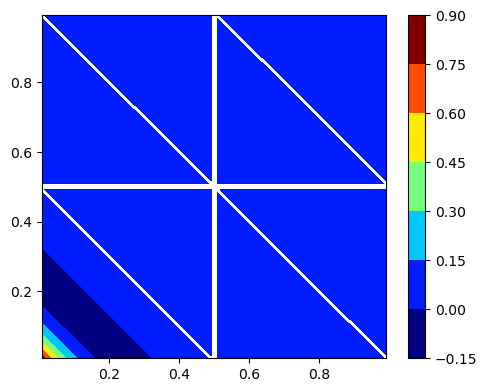

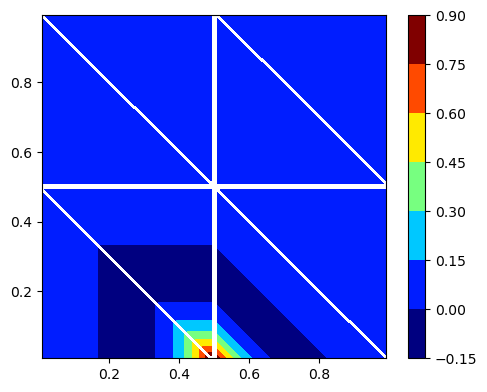

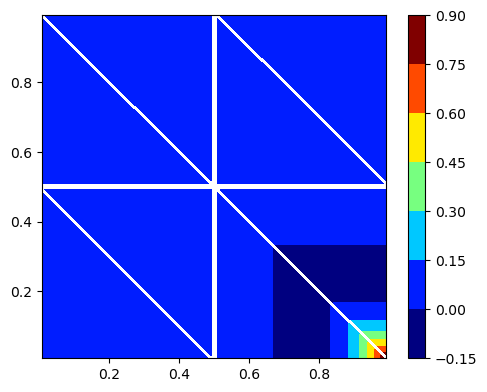

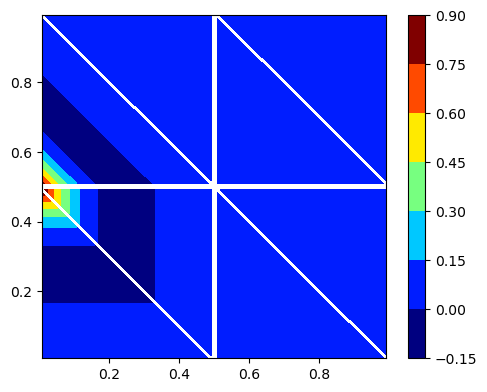

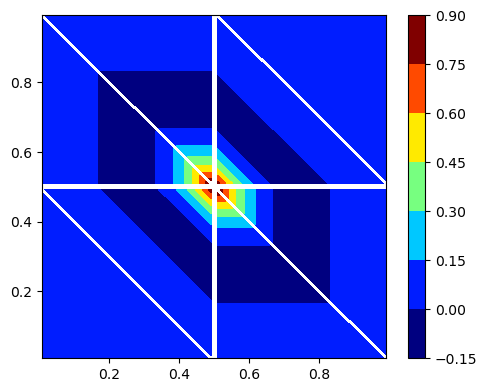

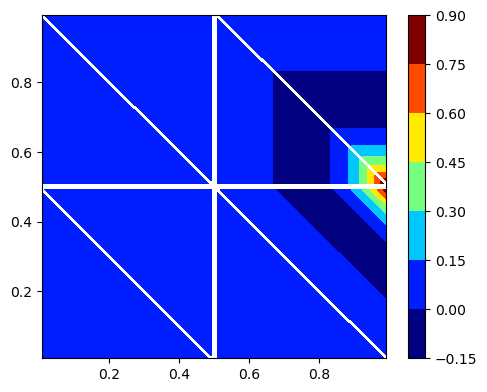

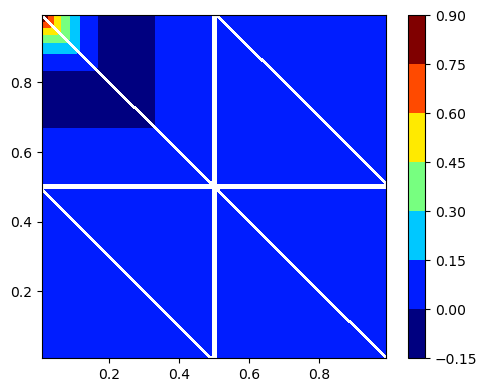

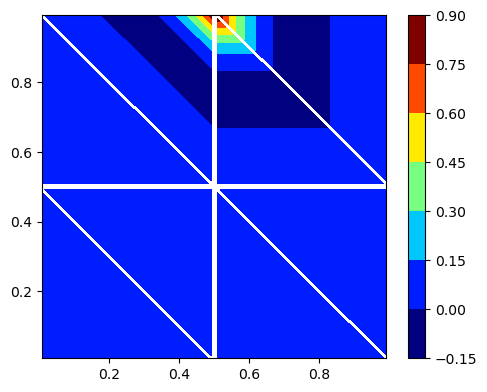

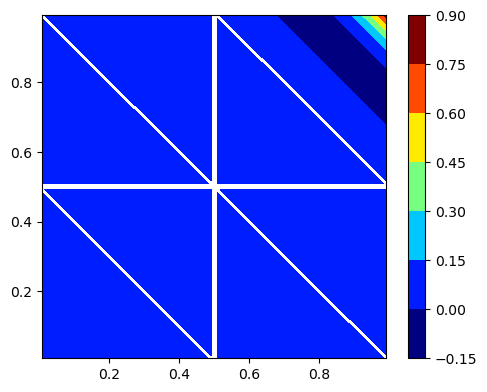

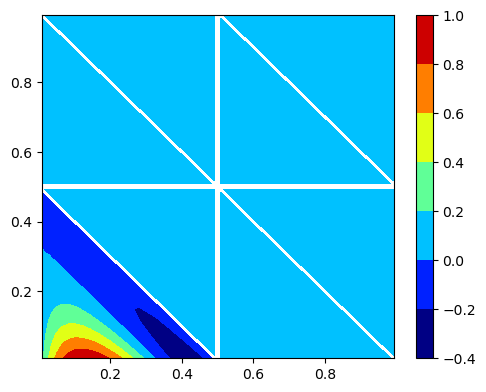

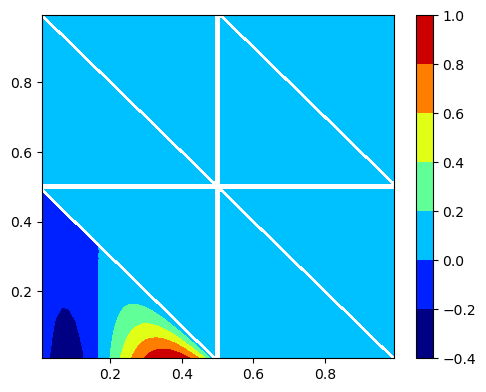

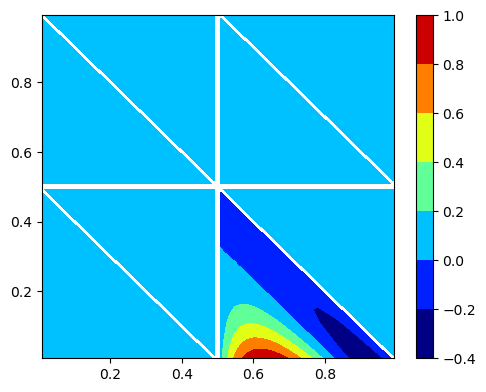

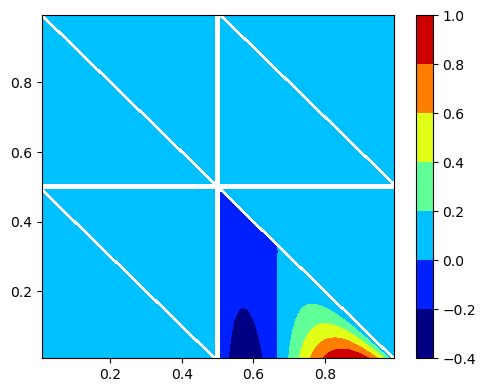

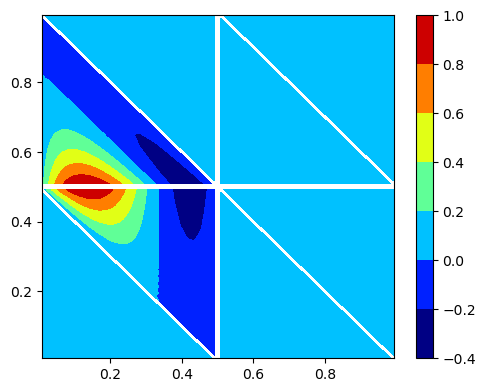

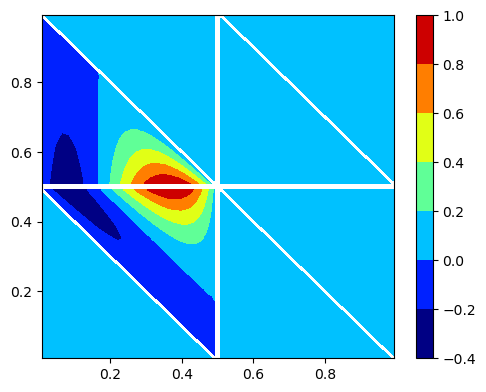

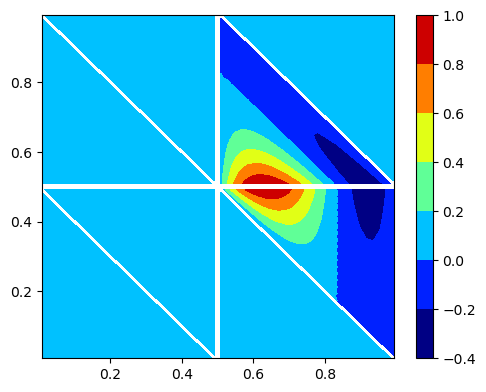

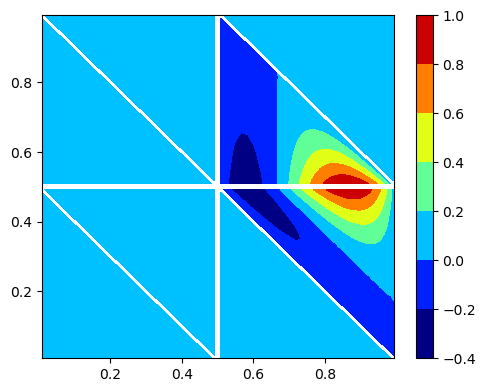

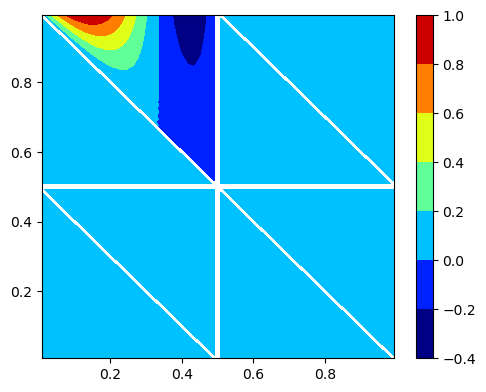

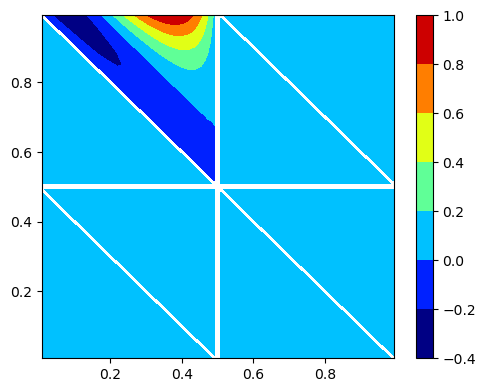

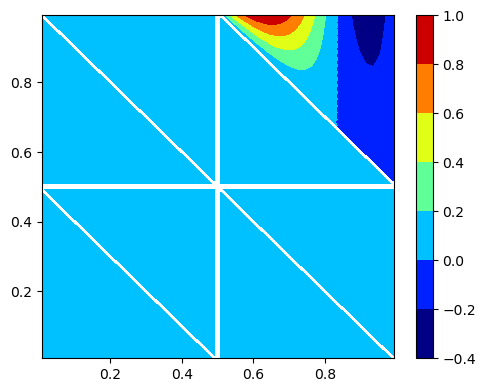

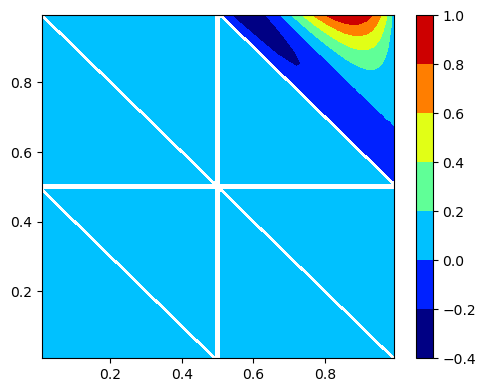

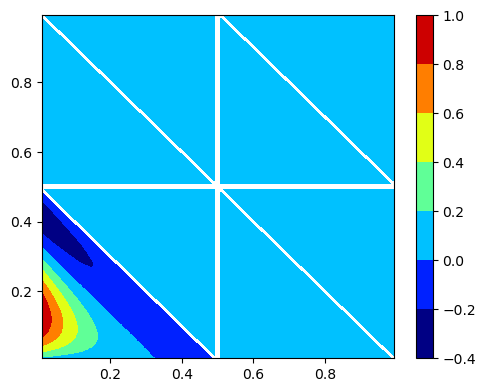

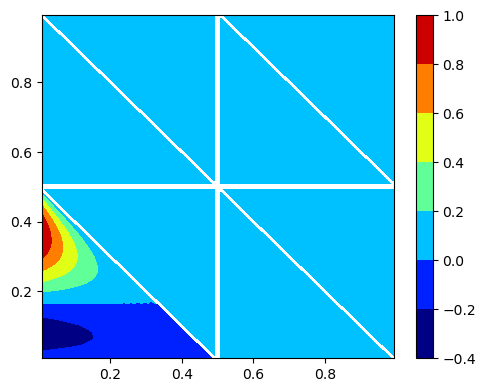

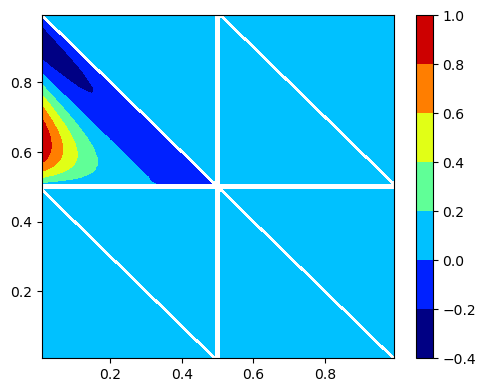

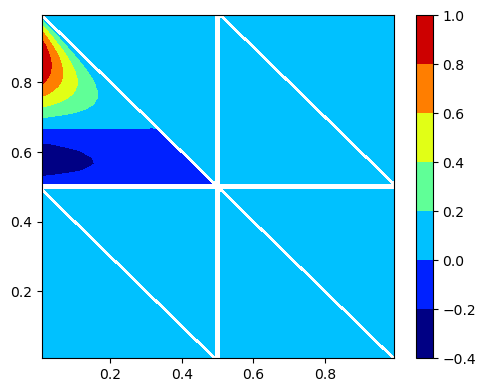

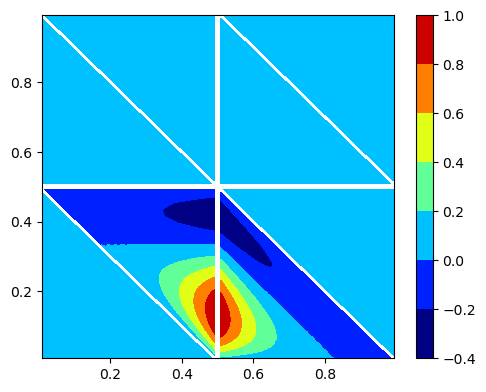

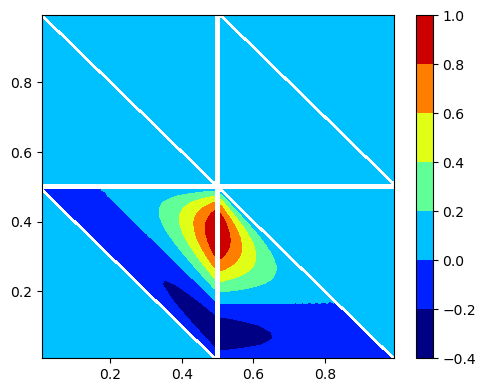

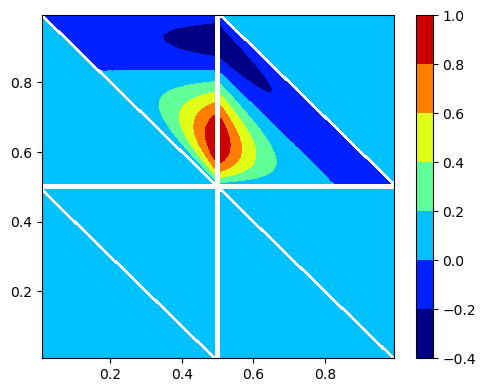

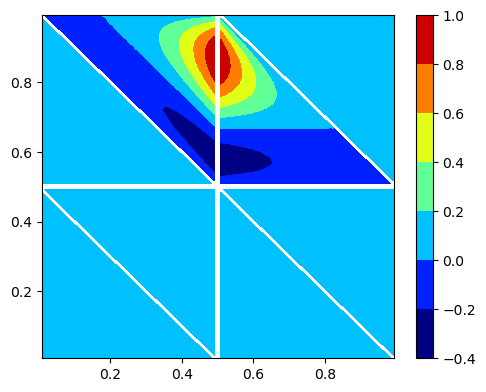

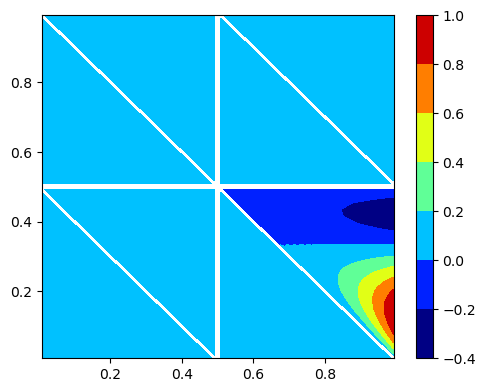

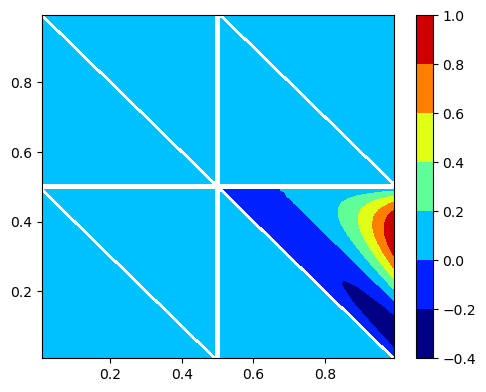

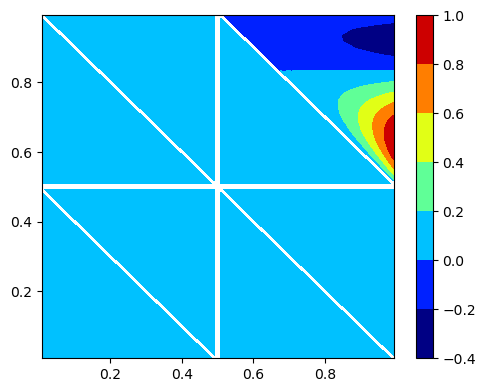

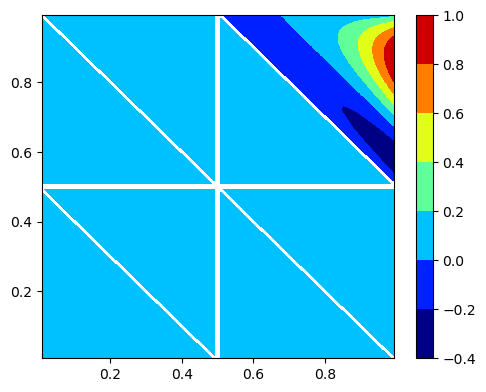

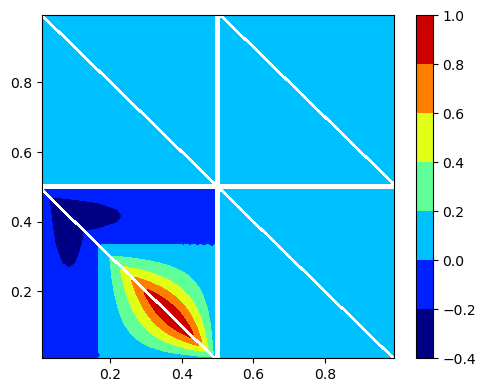

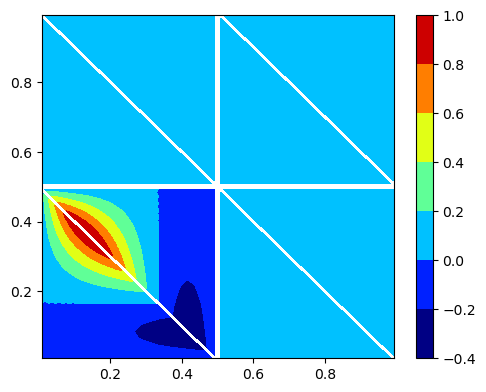

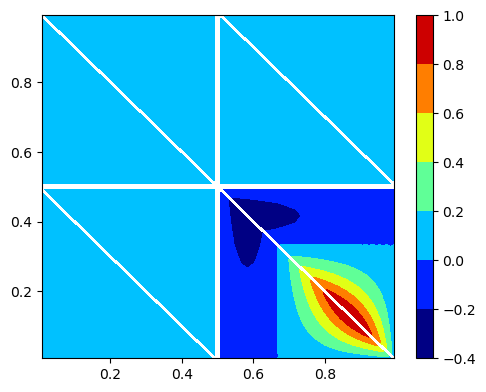

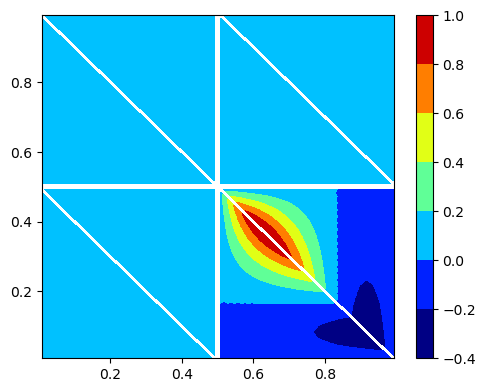

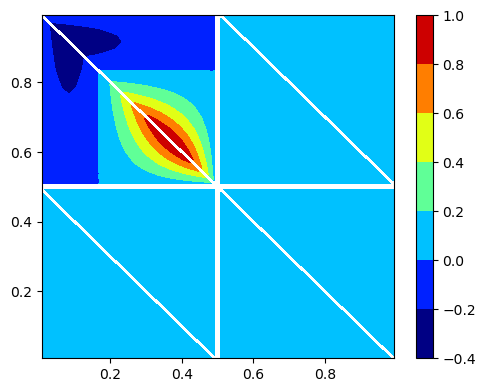

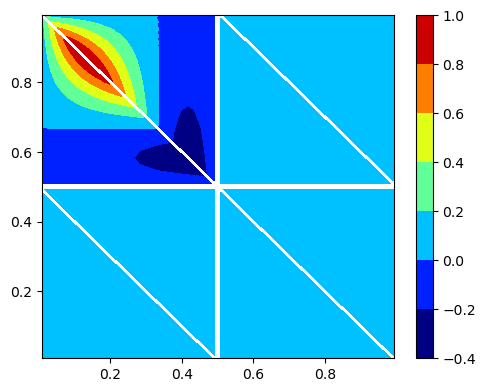

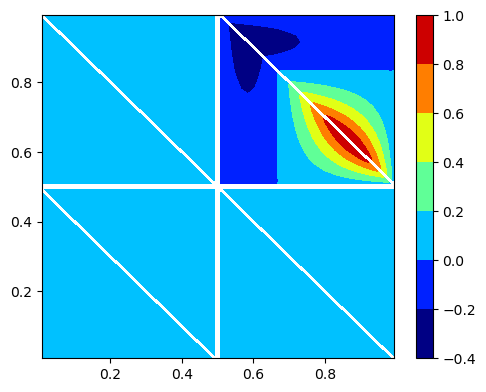

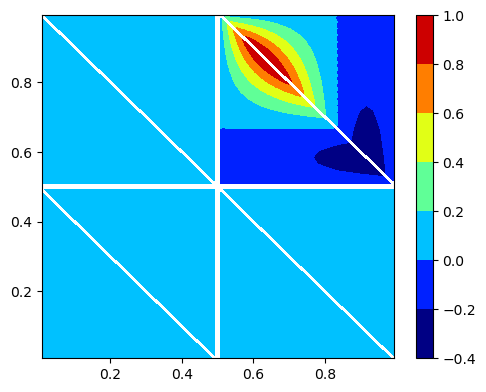

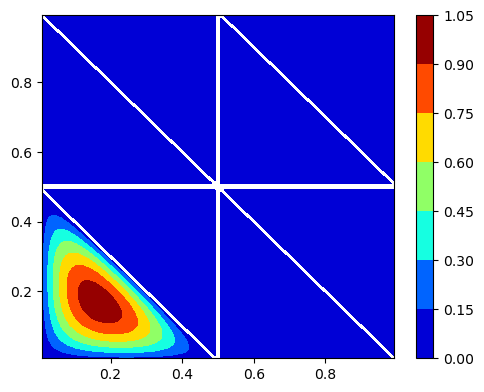

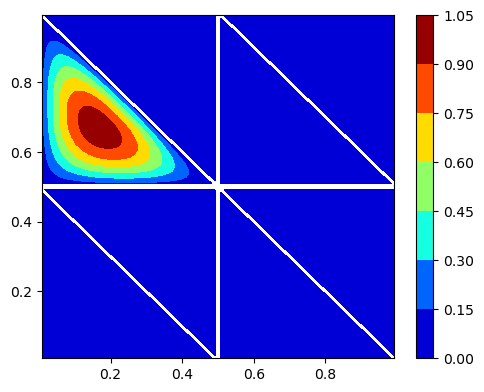

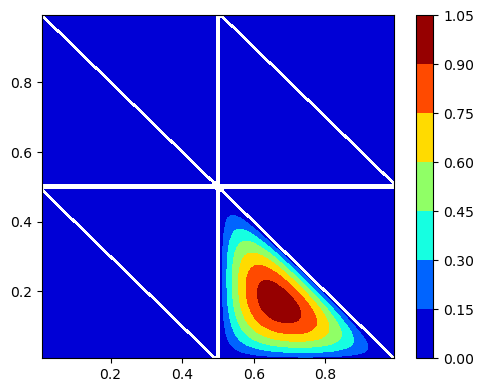

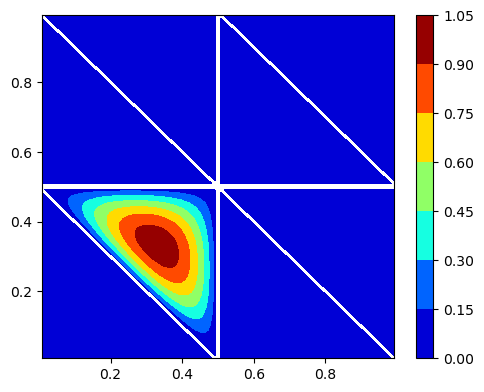

In [7]:
from methodsnm.fes import P3_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(2, 2)
fes = P3_Triangle_Space(m)
uh = FEFunction(fes)
#for i in range(len(m.vertices),fes.ndof):
for i in range(0,fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    #DrawFunction2D(uh,sampling=25,shrink_eps=0.05)   
    DrawFunction2D(uh,sampling=25,shrink_eps=0.05,contour=True, figsize=(5,4))   

#### Task `FES2D`-4 (optional)

Implement an FESpace based on the `P1Edge_Triangle_FE` where basis functions are associated to each edge.

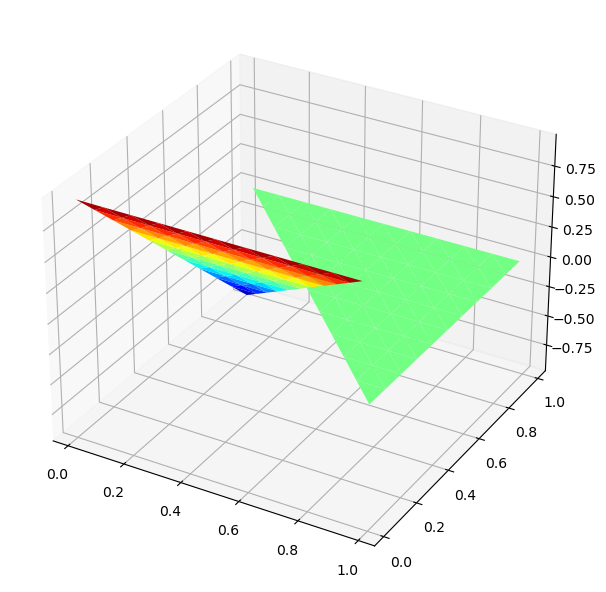

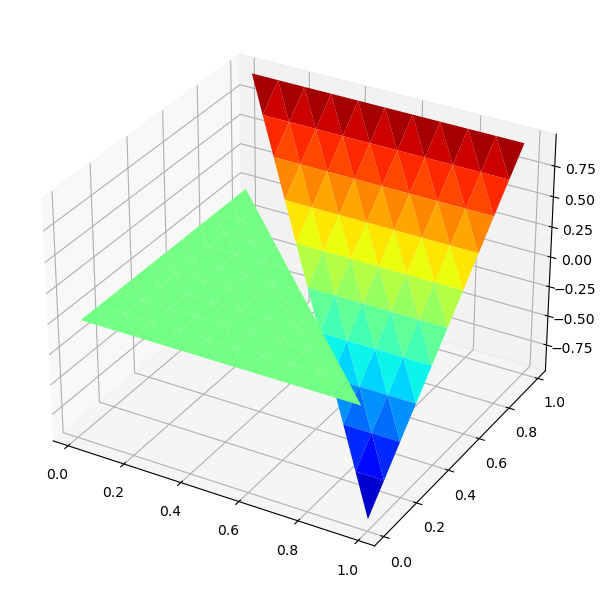

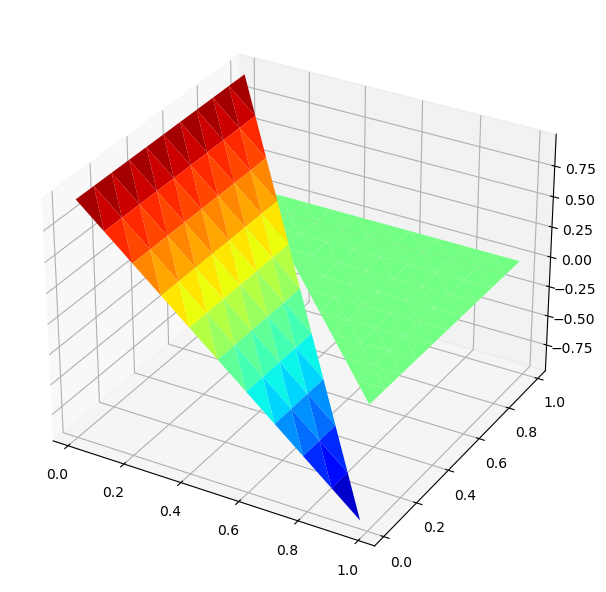

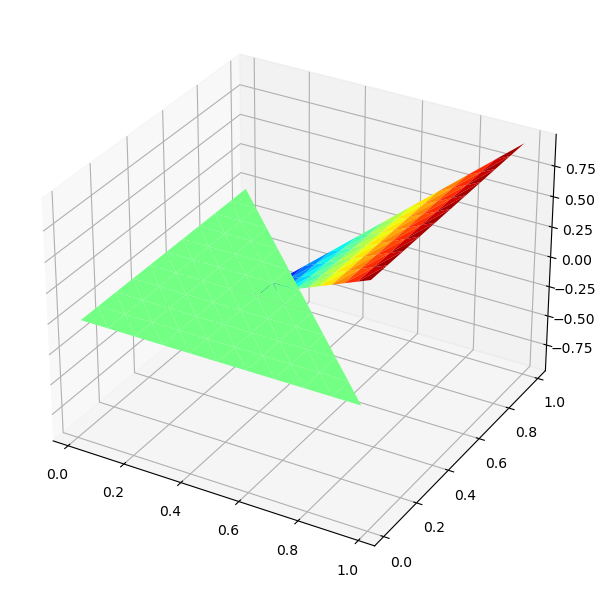

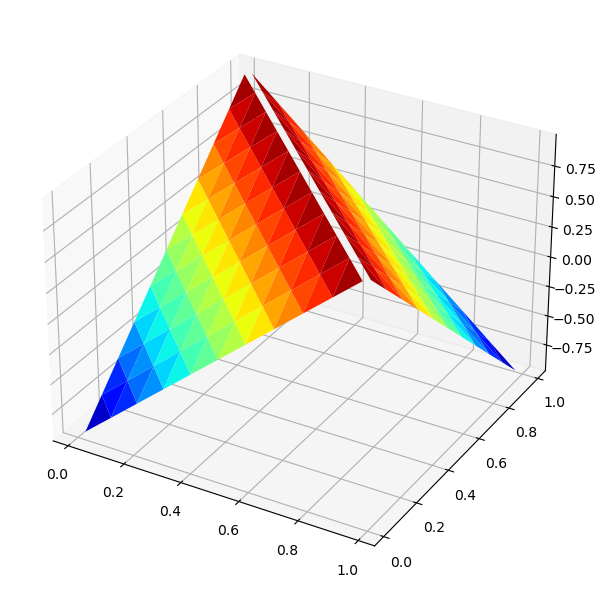

In [8]:
from methodsnm.fes import P1Edge_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P1Edge_Triangle_Space(m)
uh = FEFunction(fes)
for i in range(fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    DrawFunction2D(uh,shrink_eps=0.05)   

#### Task `FES2D-5` (optional)

Implement an additional function `interpolate` that takes another `MeshFunction` and interpolates the values based on the Lagrange interpolation:

$$
 u_h(x) = I_h(v) = \sum_{i=1}^{\texttt{ndof}} \Psi_i(v) \phi_i(x)
$$
where $\Psi_i$ are the functionals that are defined by the degrees of freedom. Note that global and local functionals have a correspondence through the finite element space. In the case of the Lagrange space, the functionals are point evaluations. 


#### Task `FES2D`-6 (optional)

Modify the finite elements to be able to use different orders on different elements.